<a href="https://colab.research.google.com/github/Mahanama90/ceri8211globalgeophysics./blob/master/Q4_(a)_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 4(a)/ Geomagnetic potential for IGRF 2005 model

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from scipy.special import sph_harm

In [0]:
a = 6371.2e3 # Radial distance from the centre of the Earth in units of km
phi = np.linspace(0,2*np.pi,100) # East longitude
theta = np.linspace(0,np.pi,100) # Geocentric co-latitude
phi,theta = np.meshgrid(phi,theta) # Generate a meshgrid


In [0]:
# Create a sphere with radius a
x = a*np.sin(theta)*np.cos(phi)
y = a*np.sin(theta)*np.sin(phi)
z = a*np.cos(theta)

In [0]:
# The Schimid (semi- or partially) normalized associated Legendre polynomial
def h_val(n,m,theta):
  if (n == 0 and m == 0):
    return 1
  elif (n== 1 and m == 0):
    return np.cos(theta)
  elif (n== 1 and m == 1):
    return np.sin(theta)
  elif (n== 2 and m == 0):
    return 0.25*((3*np.cos(2*theta))+1)
  elif (n== 2 and m == 1):
    return np.sqrt(3)*(np.cos(theta)*np.sin(theta))
  elif (n== 2 and m == 2):
    return (np.sqrt(3)/2)*np.power(np.sin(theta),2)

  

In [0]:
# Gauss coeffcients for the dipole and quadrupole components  of the geomagnetic field (IGRF for 2005)
g10 = -29557
g11 = -1672
g20 = -2341
g21 = 3047
g22 = 1657
h11 = 5080
h21 = -2595
h22 = -517

In [0]:
# Applying values to the equation for geomagnetic potential 
r1 = 1 # (a/r = 1)
x1 = g10*h_val(1,0,theta)
x2 = ((g11*np.cos(phi))+(h11*np.sin(phi)))*h_val(1,1,theta)
x3 = (g20)*h_val(2,0,theta)
x4 = ((g21*np.cos(phi))+(h21*np.sin(phi)))*h_val(2,1,theta)
x5 = ((g22*np.cos(2*phi))+(h22*np.sin(2*phi)))*h_val(2,2,theta)
k = a*r1*(x1+x2+x3+x4+x5)


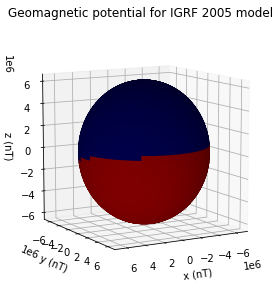

In [0]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(1,1,1, projection ='3d')
ax.plot_surface(x,y,z, rstride = 2, cstride = 2, facecolors = cm.seismic(k))
ax.view_init(10,60)
ax.set_xlabel ('x (nT)')
ax.set_ylabel ('y (nT)')
ax.set_zlabel ('z (nT)')
plt.tight_layout()
plt.title('Geomagnetic potential for IGRF 2005 model')
plt.show()